In [16]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from preprocessing import preprocess

data = pd.read_csv("data/cefr_leveled_texts.csv")
preproc_data, labels = preprocess(data)
preproc_data = preproc_data.fillna(0)
scaler = StandardScaler()
preproc_data = pd.DataFrame(scaler.fit_transform(preproc_data), columns=preproc_data.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data.label)
preproc_data.sample(5)

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,...,mean_num,mean_part,mean_pron,mean_propn,mean_punct,mean_sconj,mean_sym,mean_verb,mean_x,mean_space
765,-0.583530,1.020368,0.418779,0.642402,0.349248,0.687298,-0.179211,0.494528,0.660586,0.288938,...,0.096193,0.210689,-0.735538,-0.004909,-0.590273,1.130858,-0.316095,0.111437,-0.175351,-1.417135
209,-0.125280,0.385531,0.116639,0.569663,0.209826,0.566709,-0.242387,0.378413,0.259309,0.484620,...,0.121971,-0.663747,-0.049741,-0.119948,-0.590273,-0.291064,-0.316095,0.584930,-0.175351,-1.417135
1373,-1.827621,2.051980,2.344920,1.056266,2.425074,1.181326,0.215641,1.626657,2.518929,2.441437,...,0.465677,3.116073,3.760241,0.807556,6.236876,4.588715,-0.316095,4.824844,2.909999,-2.469552
472,1.281187,-1.016402,-1.261873,-1.745464,-1.323806,-0.020679,-0.889944,-1.076663,-1.014649,-1.472197,...,-0.393588,-0.663747,0.216957,-0.910843,-0.590273,-1.163607,-0.316095,-1.190669,-0.175351,0.424595
400,0.534637,-0.408016,-0.506524,-0.478791,-0.626700,-0.121818,-0.653033,-0.405369,-0.556881,-0.493788,...,-0.273291,0.464557,1.950499,-0.838943,-0.590273,1.033909,-0.316095,0.089914,-0.175351,-0.890927


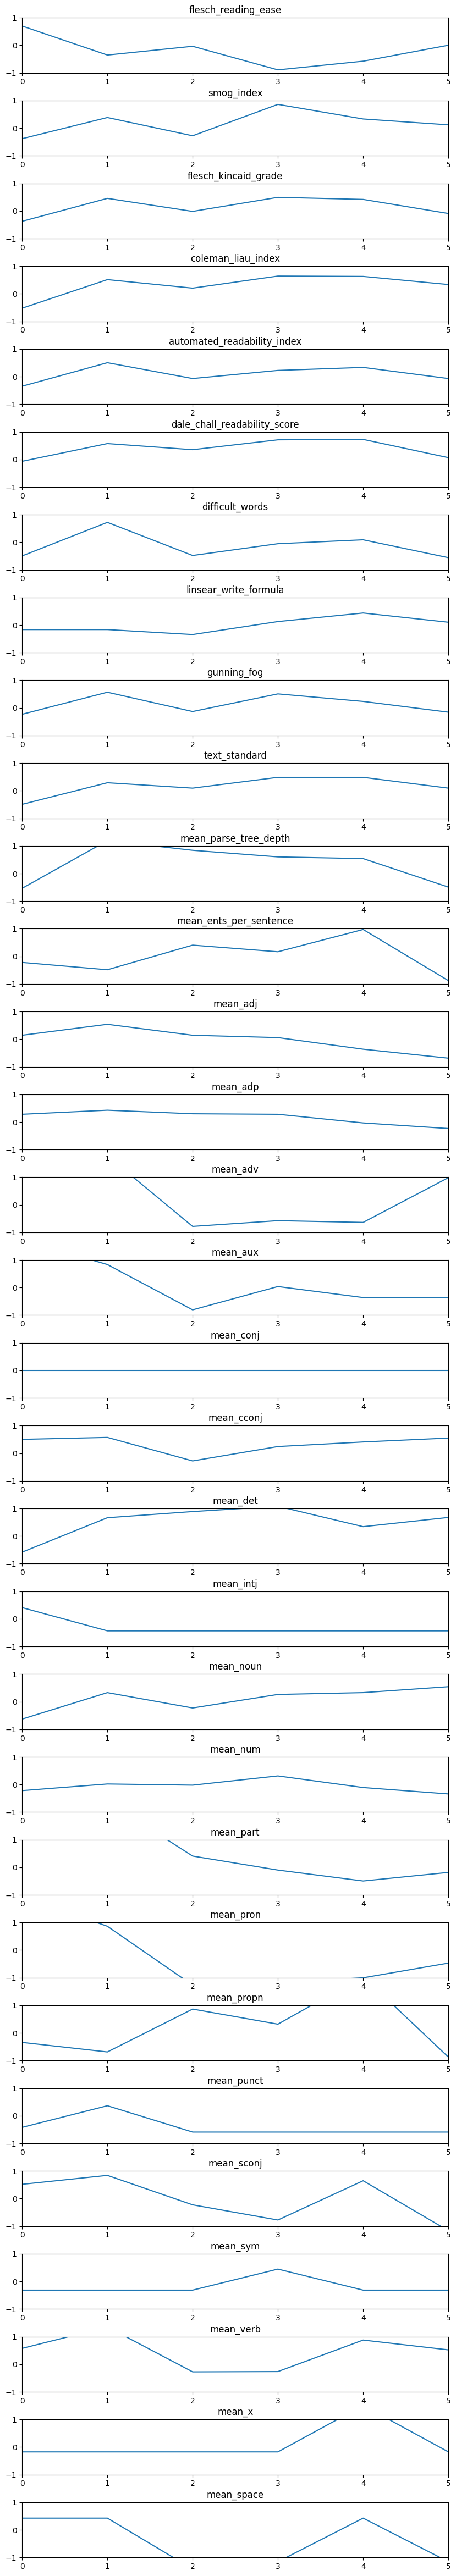

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(preproc_data.columns), figsize=(10, 60))
fig.subplots_adjust(hspace=0.5)  # Añadir espacio vertical entre gráficos

for i, column in enumerate(preproc_data.columns):
    axs[i].plot(preproc_data[column], marker='', linestyle='-')
    axs[i].set_title(column)
    axs[i].set_ylim(-1, 1)  # Establecer límites para el eje y
    axs[i].set_xlim(0, 5)   # Establecer límites para el eje x

plt.show()


In [44]:
preproc_data.to_csv("data/CEFR/preprocessed_cefr_leveled_texts.csv", index=False)